In [1]:
# Importing the important libraries
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Reading the data
data= pd.read_csv("preprocessedData.csv")
data=data.drop(['Unnamed: 0'], axis=1)
data

,id,dialect,transformed,fineText
0,939598542259277824,IQ,0,مثل ما داعش فجر تاريخ اجدادنا قبل سنه واحنه مع...
1,869345568534941696,IQ,0,احنا سنه وحق الله منفرق بس حسبى الله ونعم الوك...
2,936739253412917248,IQ,0,الكاوليه هنود مو عرب خلك غلابه عايشين بدون مشا...
3,995964915583156224,IQ,0,عليمن انطلع حركتنه بس ريد اذكر الزواج الى صدكو بى
4,633976940433510400,IQ,0,شيلوو اشتهر حسونى مع نور الزين والردح الزين
...,...,...,...,...
17995,1153015108106444800,BH,17,اى حتى الطير صايدتنه عدل
17996,1015716046085468160,BH,17,اشتكت لزوجها احس انى متضايقه فرد عليها الحنون ...
17997,1016457209851580416,BH,17,انت القمر بوسط ليلى انت مرى وحلمى انت النور لع...
17998,1153244931269566464,BH,17,عجيبه الصراحه ويامنظر الطبيعه تنسى كلشى الله ي...


In [3]:
# Data type of each column
data.dtypes

id              int64
dialect        object
transformed     int64
fineText       object
dtype: object

In [4]:
# Missing values in the data
nullData= data.isnull().sum()
nullData

id             0
dialect        0
transformed    0
fineText       9
dtype: int64

In [4]:
# Dropping the null values in the data
data= data.dropna(axis=0)
# Ensuring that there are no missing values
data.isnull().sum() / data.shape[0] * 100

id             0.0
dialect        0.0
transformed    0.0
fineText       0.0
dtype: float64

In [5]:
# Putting each word in an array, so the sentence would be array of array of words
data['fineText'] = data['fineText'].apply(lambda x: [str(word.split()) for word in x.split()]) 
data['fineText'] = data['fineText'].apply(lambda x: ' '.join(map(str, x)))
data

/var/folders/_m/2b51_hvs78l5wwx7k1rkzlym0000gn/T/ipykernel_1447/246733476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fineText'] = data['fineText'].apply(lambda x: [str(word.split()) for word in x.split()])
/var/folders/_m/2b51_hvs78l5wwx7k1rkzlym0000gn/T/ipykernel_1447/246733476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fineText'] = data['fineText'].apply(lambda x: ' '.join(map(str, x)))


,id,dialect,transformed,fineText
0,939598542259277824,IQ,0,['مثل'] ['ما'] ['داعش'] ['فجر'] ['تاريخ'] ['اج...
1,869345568534941696,IQ,0,['احنا'] ['سنه'] ['وحق'] ['الله'] ['منفرق'] ['...
2,936739253412917248,IQ,0,['الكاوليه'] ['هنود'] ['مو'] ['عرب'] ['خلك'] [...
3,995964915583156224,IQ,0,['عليمن'] ['انطلع'] ['حركتنه'] ['بس'] ['ريد'] ...
4,633976940433510400,IQ,0,['شيلوو'] ['اشتهر'] ['حسونى'] ['مع'] ['نور'] [...
...,...,...,...,...
17995,1153015108106444800,BH,17,['اى'] ['حتى'] ['الطير'] ['صايدتنه'] ['عدل']
17996,1015716046085468160,BH,17,['اشتكت'] ['لزوجها'] ['احس'] ['انى'] ['متضايقه...
17997,1016457209851580416,BH,17,['انت'] ['القمر'] ['بوسط'] ['ليلى'] ['انت'] ['...
17998,1153244931269566464,BH,17,['عجيبه'] ['الصراحه'] ['ويامنظر'] ['الطبيعه'] ...


In [6]:
# Performing embedding using and storing the embedding in the dataset
vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(data['fineText'])

SVM model:

In [7]:
# Importing Libraries:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import model_selection, naive_bayes, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import scipy.sparse as sp


In [8]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, data['transformed'], test_size=0.2, random_state=42)

In [11]:
X_train.toarray().shape


(14392, 58543)

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
param_grid = {
    'kernel': ['tanh', 'sigmoid','softmax'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.1, 1, 0.01, 0.001, 0.0001]
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

/Users/lojinkhattab/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/lojinkhattab/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lojinkhattab/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/Users/lojinkhattab/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 600, in _validate_params
    v

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best Score: 0.32531892661169853


In [ ]:
# Fit the SVM model with the best parameters on the training data
svm_model_best = SVC(**best_params)
svm_model_best.fit(X_train, y_train)

SVC(C=100, gamma=0.01, kernel='sigmoid')

In [ ]:
# Make predictions on the test data
y_pred = svm_model_best.predict(X_test)
accuracy = accuracy_score(np.array(y_test),y_pred)*100
f_score=f1_score(y_test, y_pred, average=None)
print("Accuracy:", accuracy)
print("F-score:",f_score)

Accuracy: 33.75937760489025
F-score: [0.48214286 0.38329238 0.3019802  0.25116279 0.31202046 0.4272997
 0.20095694 0.49189189 0.26872247 0.21028037 0.36612022 0.55121951
 0.4498645  0.21052632 0.23660714 0.5830721  0.26203209 0.1971831 ]


Confusion Matrix:

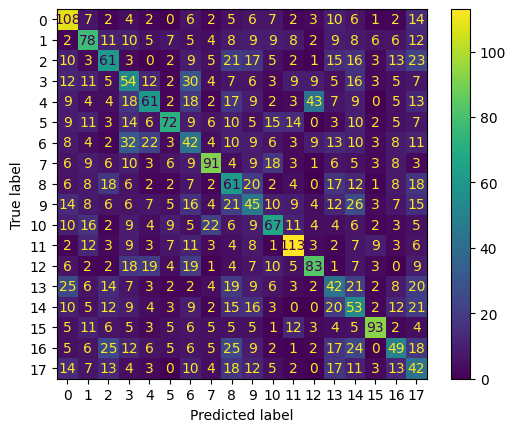

<Figure size 640x480 with 0 Axes>

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(18))
cm_display.plot()
plt.show()
plt.savefig('ConfusionMatrixSVM.png')

In [ ]:
from sklearn.metrics import classification_report

target_names = ["class_{}".format(i) for i in range(18)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.41      0.58      0.48       187
     class_1       0.38      0.39      0.38       199
     class_2       0.31      0.29      0.30       209
     class_3       0.23      0.27      0.25       200
     class_4       0.37      0.27      0.31       226
     class_5       0.53      0.36      0.43       201
     class_6       0.19      0.21      0.20       199
     class_7       0.54      0.46      0.49       200
     class_8       0.23      0.31      0.27       194
     class_9       0.21      0.21      0.21       218
    class_10       0.39      0.35      0.37       194
    class_11       0.55      0.55      0.55       206
    class_12       0.49      0.41      0.45       200
    class_13       0.21      0.22      0.21       195
    class_14       0.21      0.27      0.24       196
    class_15       0.67      0.52      0.58       180
    class_16       0.31      0.23      0.26       217
    class_17       0.17    

In [ ]:
from joblib import dump
dump(svm_model_best, 'svm.joblib')


['svm.joblib']